# Описание задачи

## Информация из предыдущих этапов

**Постановка кейса.**

В рамках практических заданий мы будем работать аналитиком на платформе по подаче объявлений. По результатам исследований мы выяснили, что недавно введенной функцией доставки пользуются редко. В рамках идей по исправлению ситуации была предложена инициатива выдать скидку в 20% на данную услугу, зачеркнув старую цену и написав рядом новую на карточках объявлений, в которых доступна доставка. Нам поставлена задача оценить данную инициативу.

**Метрики.**

По резульатам командного обсуждения было принято назначить целевой метрикой выручку. Прочие метрики, за которыми ваша команда планирует наблюдать: выручка с доставки, пользователи с доставкой, количество ошибок на экранах доставочный айтемов, количество заказов без доставки.

## Текущее задание

**Критерий.**

По результатам предыдущего исследования наш выбор пал на тест Стьюдента. Предполагаем, что будем использовать его. В этом задании вам необходимо задизайнить эксперимент, провести исследования MDE, определиться с параметрами теста.

# Вопросы дизайна эксперимента

Дайте ответы на следующие вопросы, относительного нашего эксперимента. Аргументируйте свои ответы.




1.   Что должно быть меньше в нашем эксперименте: ошибка 1 или 2 рода?
2.   В каком соотношении вы бы предпочли разбиение на тест и контроль?
3.   Как долго, на ваш взгляд, должен длиться данный тест?
4.   Насколько актуальна для данного теста проблема ослепления?
5.   Насколько актуален для данного теста эффект новизны/ привыкания?




1) В нашем тесте нет дополнительных трат на добаботку/поддержание фичи, но при этом есть риск потратить деньги на скидку и не получить эффекта. Поэтому нам важнее сократить ошибку 1 рода.
2) 50/50. Можно взять пропорцию меньше 50/50, но явных причин, указывающих на то, что она должна быть иной, нет.
3) Нужно проводить тест около 2-3 недель, чтобы пользователи не стали воспринимать цену со скидкой как базовую
4) Актуальна, так как продавцы могут захотеть, чтобы все их товары попали в акцию, и могут пытаться скрывать или перевыкладывать свой товар, чтобы он попал в тестовую группу или пытаться как-то иначе сжульничать.
5) Эффекты  новизны и привыкания актуальны, так как мы боимся получить ситуацию, когда люди привыкнут к новой цене доставки. Кроме того, возможно первоначально они могут увидеть снижение цены и пойти покупать отложенные предварительно заказы, акция может послужить триггером.

# Модификация функции расчета MDE

Функция tt_ind_solve_power вашим коллегам кажется не очень удобной: нужно помнить про эффект Коэна, как переводить в него и из него и так далее. Несколько новичков в команде уже допустило ошибку при работе с данной функцией. Ваша задача - расширить функционал данной функции. Напишите свою версию, которая будет принимать на вход все аргументы из tt_ind_solve_power, но с двумя отлияичми: вместо d эффекта Коэна она будет принимать (или возвращать) размер эффекта в долях, а также дополнительно будет принимать набор данных: pandas серию или numpy массив. В остальном ваша функция должна работать как и предшественница: принимать на вход 3 аргумента + данные, и выдавать четвертый непереданный. Напишите docstring к функции, чтобы в дальнейшем ваши коллеги могли ей пользоваться.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

In [10]:
def my_solve_power(
    data,
    effect_size=None,
    nobs1=None,
    alpha=None,
    power=None,
    ratio=1.0,
    alternative='two-sided'
    )-> float:
    """
    Функция принимает на вход параметры data, effect_size, nobs1, alpha, power, ratio, alternative.
    Требует установленных numpy и statsmodels.
    Параметры:
    data : pandas.Series или numpy.array, optional
        Данные для расчета стандартного отклонения. Если передан, используется для перевода
        размера эффекта в долях в эффект Коэна.
    effect_size : float, optional
        Размер эффекта в долях (например, 0.1 для 10% эффекта). Если не передан, будет рассчитан.
    nobs1 : int, optional
        Количество наблюдений в первой группе. Если не передано, будет рассчитано.
    alpha : float, optional
        Уровень значимости (по умолчанию 0.05). Если не передан, будет рассчитан.
    power : float, optional
        Мощность теста (по умолчанию 0.8). Если не передана, будет рассчитана.
    ratio : float, optional
        Соотношение размеров групп (nobs2 / nobs1). По умолчанию 1.0.
    alternative : str, optional
        Тип альтернативной гипотезы: 'two-sided' (двусторонняя) или 'one-sided' (односторонняя).
        По умолчанию 'two-sided'.

    Возвращает Рассчитанный параметр (effect_size, nobs1, alpha или power), который не был передан.
    """

    import numpy as np
    from statsmodels.stats.power import tt_ind_solve_power # Решил импортировать функцию внутри, чтобы не надо было писать импорт перед вызовом
    
    # Проверка входных данных
    if sum(x is None for x in [effect_size, nobs1, alpha, power]) != 1:
        raise ValueError("Должен быть передан ровно один из параметров: effect_size, nobs1, alpha, power.")

    # Если передан data, рассчитываем стандартное отклонение
    if data is not None:
        if isinstance(data, (pd.Series, np.ndarray)):
            std = np.std(data, ddof=1)  # Используем несмещенное стандартное отклонение
        else:
            raise TypeError("data должен быть pandas.Series или numpy.array.")
    else:
        raise ValueError("Должен быть передан параметр data")

    # Переводим effect_size в Эффект Коэна
    if effect_size is not None:
        effect_size_cohen = effect_size / std
    else:
        effect_size_cohen = None

    # пользуемся tt_ind_solve_power
    result = tt_ind_solve_power(
        effect_size=effect_size_cohen,
        nobs1=nobs1,
        alpha=alpha,
        power=power,
        ratio=ratio,
        alternative=alternative
    )

    # Если рассчитывали effect_size, переводим его обратно в доли
    if effect_size is None:
        result = result * std

    return result

Прогоните ваш код на следующих примерах (по ним будет оцениваться корректность работы):

In [5]:
import pandas as pd
data = pd.read_csv('task_2.csv')

In [11]:
my_solve_power(
    data=data['revenue'],
    effect_size=None,
    nobs1=1_000_000,
    alpha=0.01,
    power=0.99,
    ratio=1.0,
    alternative='two-sided'
    )

2.886173101769587

In [12]:
my_solve_power(
    data=data['error_count'],
    effect_size=0.05,
    nobs1=None,
    alpha=0.05,
    power=0.9,
    ratio=1.0,
    alternative='larger'
    )

13953.87059828183

# Trade-off: alpha, beta, MDE

Наша пользовательская база - 10 миллионов пользователей. Положим, мы хотим исследовать двусторонние гипотезы с разделением 50 на 50, и нам доступна вся база. Создайте таблицу (pandas.DataFrame) зависимости MDE в % от ошибок 1 и 2 рода только для целевой метрики - revenue. То есть в индексах - ошибки 2 рода, в названии столбцов - ошибки 1 рода, а в ячейках - MDE в %. Прокомментируйте получившиеся результаты. Какое соотношение вам кажется оптимальным в вашем тесте?



In [14]:
alphas = [0.2, 0.1, 0.05, 0.01, 0.001]
betas = [0.2, 0.1, 0.05, 0.01, 0.001]

Воспользуемся формулой MDE:

$$ MDE = \left( Z_{1-\alpha/2} + Z_{1-\beta} \right) \times \sqrt{\frac{2 \times \sigma^2}{n}} $$

In [30]:
from scipy.stats import norm
import numpy as np

mde_table = pd.DataFrame(index=betas, columns=alphas)

# Вычислим то, что не будет меняться в нашей формуле
variance = data['revenue'].var()
has_revenue_share = 1 - (data['revenue'] == 0).sum() / len(data)
# Я ожидаю, что в генеральной совокупности доля пользователей без выручки та же
# Хотя доставку могут начать заказывать больше пользователей, я решил рассчитать MDE на случай, если этого влияния не будет
n = 10000000 * has_revenue_share
value = np.sqrt(2 * variance / n)
mean_revenue = data['revenue'].mean()

for alpha in alphas:
    for beta in betas:
        z_alpha = norm.ppf(1 - alpha/2)
        z_beta = norm.ppf(1 - beta)
        mde_absolute = (z_alpha + z_beta) * value  # Абсолютное значение MDE
        mde_relative = (mde_absolute / mean_revenue) * 100  # MDE в процентах от выручки
        mde_table.loc[beta, alpha] = round(mde_relative, 2)

mde_table # По горизонтали a, по вертикали B

,0.200,0.100,0.050,0.010,0.001
0.200,1.42,1.66,1.87,2.29,2.76
0.100,1.71,1.96,2.17,2.58,3.06
0.050,1.96,2.2,2.41,2.82,3.3
0.010,2.41,2.66,2.87,3.28,3.76
0.001,2.92,3.17,3.38,3.79,4.27


Все значения выглядят высокими, но если мы ожидаем, что снижение цены приведёт к росту выручки, то мы можем взять относительно высокий MDE (a=0.001 и B=0.01), так как мы снижаем цену на 20%, и маленькие эффекты на выручку нас вряд ли заинтересуют. MDE в 3.06% нас устроит.

# Зависимость MDE от N


Также вашей команде стало интересно: а как меняется MDE в зависимости от количества наблюдений? Положим, мы зафиксировали уровни ошибок 1 и 2 родов на уровне 1%. Тогда выведите на одном графике зависимость MDE (в % по оси Y) от N (в обеих группах суммарно по оси X). Прокомментируйте получившиеся результаты. График какой функции напоминают такие результаты?

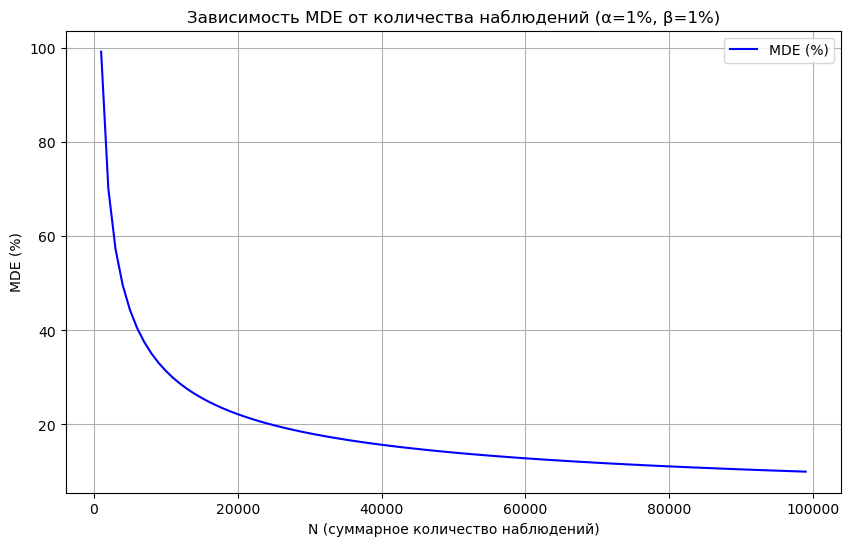

In [31]:
import matplotlib.pyplot as plt

# Зафиксируем уровни ошибок
alpha = 0.01
beta = 0.01

# Посчитаем то, что не будет меняться в зависимости от N
z_alpha = norm.ppf(1 - alpha / 2)
z_beta = norm.ppf(1 - beta)
variance = data['revenue'].var()
mean_revenue = data['revenue'].mean()

# Зададим диапазон для числа наблюдений
N_values = np.arange(1000, 100000, 1000)  # От 1000 до 100000 с шагом 1000

# Вычислим MDE для каждого N
mde_values = []
for N in N_values:
    value = np.sqrt(2 * variance / N)
    mde_absolute = (z_alpha + z_beta) * value  # Абсолютное значение MDE
    mde_relative = (mde_absolute / mean_revenue) * 100  # MDE в процентах
    mde_values.append(mde_relative)

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(N_values, mde_values, label='MDE (%)', color='blue')
plt.xlabel('N (суммарное количество наблюдений)')
plt.ylabel('MDE (%)')
plt.title('Зависимость MDE от количества наблюдений (α=1%, β=1%)')
plt.grid(True)
plt.legend()
plt.show()

MDE быстро падает при наборе первых 10000 наблюдений, а затем снижается чуть медленнее. Это похоже на экспоненциальную функцию

# Финал дизайна

Пришла пора финализировать дизайн эксперимента.


*   На каком уровне ошибок 1 и 2 рода, а также N и MDE вы рекоммендуете остановиться? Проведите дополнительные исследования при необходимости.
*   Зафиксируйте по пунктам весь важный контекст исследования, который пойдет в карточку эксперимента до его запуска (метрики, alpha, ...).



### Нужно посчитать MDE для остальных метрик

In [34]:
data.columns

Index(['user_id', 'revenue', 'delivery_revenue', 'has_delivery', 'error_count',
       'order_wo_delivery'],
      dtype='object')

In [41]:
from scipy.stats import norm
import numpy as np

metrics = ['delivery_revenue', 'has_delivery', 'error_count', 'order_wo_delivery']
mde_table = pd.DataFrame(index=metrics, columns=['mde'])

# Вычислим то, что не будет меняться в нашей формуле
n = 10000000
alpha = 0.001
beta = 0.1
z_alpha = norm.ppf(1 - alpha/2)
z_beta = norm.ppf(1 - beta)

for metric in metrics:
    mean_metric = data[metric].mean()
    variance = data[metric].var()
    value = np.sqrt(2 * variance / n)
    mde_absolute = (z_alpha + z_beta) * value  # Абсолютное значение MDE
    mde_relative = (mde_absolute / mean_metric) * 100  # MDE в процентах от выручки
    mde_table.loc[metric, 'mde'] = round(mde_relative, 2)

mde_table

,mde
delivery_revenue,1.69
has_delivery,1.27
error_count,2.81
order_wo_delivery,0.24


| Поле                          | Описание                                                                 |
|-------------------------------|-------------------------------------------------------------------------|
| Цель эксперимента | Оценить влияние цены на доставку на выручку |
| Основная гипотеза | Если дать скидку 20% на доставку (зачеркнув старую цену и написав рядом новую на карточках объявлений), то это приведёт к росту общей выручки не менее чем на 9,78%.|
| alpha, power, N, MDE целевой метрики | alpha = 0.001, beta = 0.1, N = 10 000 000, MDE выручки = 3.06%|
| Список метрик с MDE | Выручка с доставки (1,69%), наличие доставки (1,27%), наличие ошибок (2,81%), доля без доставки (0,24%)|
| Длительность эксперимента | 28 дней |
| Дата старта эксперимента | 01.02.2025 |
| Заказчик | команда Практикума |
| Исполнитель | Фомин Павел Александрович |
| Артефакты | Ссылки на документы, презентации, дашборды и т.д.|
| Важный контекст, риски |Важно избежать эффекта новизны и покрутить тест подольше|